In [29]:
# Anscombe's quartet 
# Author: Drishtii
try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns
    
try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    from sklearn.linear_model import LinearRegression
except:
    %pip install scikit-learn
    from sklearn.linear_model import LinearRegression
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp


In [95]:
import os
dev_mode =  1 or "DEV_MODE" in os.environ

if dev_mode:
    import sys
    sys.path.append("../scripts")
    import pyprobml_utils as pml
    from latexify import latexify
    latexify(scale_factor=1, fig_height=1.5)

In [96]:
SCATTER_SIZE = 8 if dev_mode else 20
FIG_SIZE = None if dev_mode else (12,3)
df = sns.load_dataset("anscombe")

In [97]:
def make_graph(ax,data,color=None):
    x = data["x"]
    y = data["y"]
    dataset_no = data["dataset_no"]
    
    
    model = LinearRegression().fit(x,y)
    x_range = jnp.linspace(1,20,num=20).reshape(-1,1)
    y_pred = model.predict(x_range)
    
    ax.plot(x_range,y_pred,color=color)
    ax.scatter(x,y,s=SCATTER_SIZE,color=color)
    
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 14)
    ax.set_title(f"Dataset = {dataset_no}")
    
    ax.set_xlabel("x")
    ax.set_xlabel("y")
    

saving image to /home/patel_zeel/AQ-NewsArticles/ProbML/pyprobml-fork/scripts/../figures/anscombes_quartet_latexified.pdf


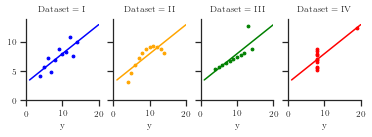

In [98]:
names = df['dataset'].unique()
fig, axes = plt.subplots(1,4, sharey=True,figsize=FIG_SIZE)  

colors = ['blue','orange','green','red']
for i in range(4):
    data_df = df[df["dataset"] == names[i]]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"].values.reshape(-1,1)
    y = data_df["y"].values.reshape(-1,1)

    data = {
    "x":x,
    "y":y,
    "dataset_no":names[i]
    }
    ax = axes[i]
    make_graph(ax,data, color=colors[i])
sns.despine()
pml.savefig(f"anscombes_quartet_latexified.pdf")

I
          x          y
count  11.0  11.000000
mean    9.0   7.500909
var    11.0   4.127269
saving image to /home/patel_zeel/AQ-NewsArticles/ProbML/pyprobml-fork/scripts/../figures/anscombes_quartet_I_latexified.pdf
II
          x          y
count  11.0  11.000000
mean    9.0   7.500909
var    11.0   4.127629
saving image to /home/patel_zeel/AQ-NewsArticles/ProbML/pyprobml-fork/scripts/../figures/anscombes_quartet_II_latexified.pdf
III
          x         y
count  11.0  11.00000
mean    9.0   7.50000
var    11.0   4.12262
saving image to /home/patel_zeel/AQ-NewsArticles/ProbML/pyprobml-fork/scripts/../figures/anscombes_quartet_III_latexified.pdf
IV
          x          y
count  11.0  11.000000
mean    9.0   7.500909
var    11.0   4.123249
saving image to /home/patel_zeel/AQ-NewsArticles/ProbML/pyprobml-fork/scripts/../figures/anscombes_quartet_IV_latexified.pdf


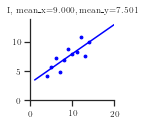

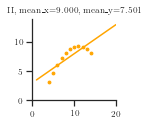

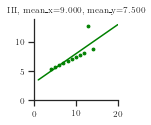

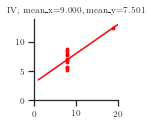

In [92]:
latexify(scale_factor=4, fig_height=1.5)
for i,name in enumerate(names):
    plt.figure()
    print(name)
    name_index = df['dataset']==name
    data_df = df[name_index]
    data_df = data_df.sort_values(by="x")
    x = data_df["x"].values.reshape(-1,1)
    y = data_df["y"].values.reshape(-1,1)

    data = {
    "x":x,
    "y":y,
    "dataset_no":names[i]
    }
    ax = plt.gca()
    make_graph(ax,data,colors[i])
    
    mean_x = data_df['x'].to_numpy().mean();
    mean_y = data_df['y'].to_numpy().mean()
    ax.set_title(f'{name}, mean_x={mean_x:0.3f}, mean_y={mean_y:0.3f}')
    print(data_df[['x', 'y']].agg(['count', 'mean', 'var']))
    if dev_mode:
        pml.savefig(f"anscombes_quartet_{name}_latexified.pdf")
        
    sns.despine();

In [78]:
# Compare the two different estimators for the variance
# https://github.com/probml/pml-book/issues/264
for d in ['I', 'II', 'III', 'IV']:
    print('dataset ', d)

    x = df[df['dataset'] == d]['x'].to_numpy()
    print('var x, MLE = {:.2f}'.format(((x - x.mean()) ** 2).mean()))
    print('var x, numpy: {:.2f}'.format(x.var()))
    print('var x, unbiased estimator: {:.2f}\n'.format(x.var(ddof=1)))

    y = df[df['dataset'] == d]['y'].to_numpy()
    print('var y, MLE = {:.2f}'.format(((y - y.mean())**2).mean()))
    print('var y, numpy: {:.2f}'.format(y.var()))
    print('var y, unbiased estimator: {:.2f}\n'.format(y.var(ddof=1)))

dataset  I
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.13

dataset  II
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.13

dataset  III
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.12

dataset  IV
var x, MLE = 10.00
var x, numpy: 10.00
var x, unbiased estimator: 11.00

var y, MLE = 3.75
var y, numpy: 3.75
var y, unbiased estimator: 4.12

